In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load emissions data
url = 'https://raw.githubusercontent.com/garyhchenjobs/IST718-Group_Final/main/GLEAM_LivestockEmissions.csv'
emissions = pd.read_csv(url)
print(emissions.head(5))

   Region Animal species  Production system   Commodity  \
0  Global         Cattle         Aggregated  Aggregated   
1  Global         Cattle         Aggregated        Milk   
2  Global         Cattle         Aggregated        Meat   
3  Global         Cattle  Grassland systems  Aggregated   
4  Global         Cattle  Grassland systems        Milk   

   Emission Intensity (kg CO2e per kg protein)  Production (kg protein)  \
0                                        160.3             2.916310e+10   
1                                         86.7             1.888089e+10   
2                                        295.4             1.028222e+10   
3                                        206.3             1.033817e+10   
4                                         95.0             6.940654e+09   

   Total GHG emissions (kg CO2e)  Total CO2 emissions (kg CO2e)  \
0                   4.670000e+12                   9.450000e+11   
1                   1.640000e+12                   2.760000e

In [3]:
# restrict to East Asia and Southeast Asia
emissions = emissions.loc[emissions['Region'] == 'East Asia and Southeast Asia']

In [4]:
crop = pd.read_csv('https://raw.githubusercontent.com/garyhchenjobs/IST718-Group_Final/main/crops_north_america.csv')
crop.head()

,Unnamed: 0,Area,Item,Element,Year,Unit,Value
0,29614,Antigua and Barbuda,Bananas,Area harvested,1966,ha,3.0
1,29615,Antigua and Barbuda,Bananas,Area harvested,1967,ha,6.0
2,29616,Antigua and Barbuda,Bananas,Area harvested,1968,ha,8.0
3,29617,Antigua and Barbuda,Bananas,Area harvested,1969,ha,10.0
4,29618,Antigua and Barbuda,Bananas,Area harvested,1970,ha,10.0


In [5]:
live = pd.read_csv('https://raw.githubusercontent.com/garyhchenjobs/IST718-Group_Final/main/live1.csv')
live.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0


In [6]:
emissions = pd.read_csv('https://raw.githubusercontent.com/garyhchenjobs/IST718-Group_Final/main/GLEAM_LivestockEmissions.csv')
emissions.head()

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.670000e+12,9.450000e+11,2.650000e+12,1.080000e+12,...,1.740000e+11,7.420000e+11,4.687954e+10,3.870000e+11,2.510000e+12,1.390000e+11,1.650000e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.640000e+12,2.760000e+11,9.680000e+11,3.940000e+11,...,7.166208e+10,2.540000e+11,1.497421e+10,NaN,8.860000e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.040000e+12,6.690000e+11,1.680000e+12,6.870000e+11,...,1.020000e+11,4.880000e+11,3.190534e+10,3.870000e+11,1.620000e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.130000e+12,5.630000e+11,1.050000e+12,5.170000e+11,...,5.253660e+10,4.270000e+11,8.194330e+09,3.870000e+11,9.970000e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.590000e+11,9.286140e+10,3.710000e+11,1.950000e+11,...,2.156126e+10,1.590000e+11,2.412100e+09,NaN,3.370000e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10


In [7]:
# for pigs set commodity to aggregated instead of meat

In [9]:
# East Asia and Southeast Asia
# keep only production system = aggregated and commodity = aggregated
emissions = emissions.loc[(emissions['Region'] == 'East Asia and Southeast Asia') &(emissions['Commodity'] == 'Aggregated') & (emissions['Production system'] == 'Aggregated')]
                           
emissions.head()

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
53,East Asia and Southeast Asia,Cattle,Aggregated,Aggregated,184.4,2.987340e+09,5.510000e+11,9.177232e+10,3.340000e+11,1.250000e+11,...,3.770133e+10,6.348248e+10,1.940060e+09,NaN,3.250000e+11,8.874031e+09,2.384849e+10,3.757554e+09,1.647682e+09,9.080869e+09
64,East Asia and Southeast Asia,Buffaloes,Aggregated,Aggregated,389.5,2.515805e+08,9.798409e+10,1.356538e+10,6.524908e+10,1.916964e+10,...,5.186010e+09,6.452513e+09,1.110742e+07,NaN,6.373950e+10,1.509578e+09,7.531116e+09,2.492839e+08,7.208811e+07,1.300979e+09
73,East Asia and Southeast Asia,Sheep,Aggregated,Aggregated,165.9,2.770163e+08,4.595721e+10,6.557200e+09,2.462757e+10,1.477244e+10,...,3.124516e+09,1.103202e+10,1.111335e+07,NaN,2.395182e+10,6.757552e+08,6.159064e+08,1.081425e+08,3.381730e+08,2.679168e+08
82,East Asia and Southeast Asia,Goats,Aggregated,Aggregated,165.4,2.993806e+08,4.951344e+10,9.096476e+09,3.293789e+10,7.479068e+09,...,4.047680e+09,2.607993e+09,1.672410e+06,NaN,3.149163e+10,1.446258e+09,8.233956e+08,6.464248e+08,4.481106e+08,3.339700e+08
91,East Asia and Southeast Asia,Pigs,Aggregated,Aggregated,62.8,7.291823e+09,4.580000e+11,1.950000e+11,1.480000e+11,1.150000e+11,...,6.869189e+10,1.569576e+10,2.760193e+10,NaN,1.665441e+10,9.991075e+10,3.085459e+10,6.775204e+09,7.125333e+08,1.767153e+10


In [10]:
# animals in East Asia and Southeast Asiaby CO2 emissions
emissions.sort_values(by=["Total CO2 emissions (kg CO2e)"], ascending=False)

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
95,East Asia and Southeast Asia,Chicken,Aggregated,Aggregated,44.9,8.309233e+09,3.730000e+11,2.560000e+11,8.618132e+09,1.080000e+11,...,6.876894e+10,2.373567e+10,6.889729e+10,NaN,NaN,6.193934e+09,1.585217e+10,2.080202e+10,1.056223e+09,2.276913e+10
91,East Asia and Southeast Asia,Pigs,Aggregated,Aggregated,62.8,7.291823e+09,4.580000e+11,1.950000e+11,1.480000e+11,1.150000e+11,...,6.869189e+10,1.569576e+10,2.760193e+10,NaN,1.665441e+10,9.991075e+10,3.085459e+10,6.775204e+09,7.125333e+08,1.767153e+10
53,East Asia and Southeast Asia,Cattle,Aggregated,Aggregated,184.4,2.987340e+09,5.510000e+11,9.177232e+10,3.340000e+11,1.250000e+11,...,3.770133e+10,6.348248e+10,1.940060e+09,NaN,3.250000e+11,8.874031e+09,2.384849e+10,3.757554e+09,1.647682e+09,9.080869e+09
64,East Asia and Southeast Asia,Buffaloes,Aggregated,Aggregated,389.5,2.515805e+08,9.798409e+10,1.356538e+10,6.524908e+10,1.916964e+10,...,5.186010e+09,6.452513e+09,1.110742e+07,NaN,6.373950e+10,1.509578e+09,7.531116e+09,2.492839e+08,7.208811e+07,1.300979e+09
82,East Asia and Southeast Asia,Goats,Aggregated,Aggregated,165.4,2.993806e+08,4.951344e+10,9.096476e+09,3.293789e+10,7.479068e+09,...,4.047680e+09,2.607993e+09,1.672410e+06,NaN,3.149163e+10,1.446258e+09,8.233956e+08,6.464248e+08,4.481106e+08,3.339700e+08
73,East Asia and Southeast Asia,Sheep,Aggregated,Aggregated,165.9,2.770163e+08,4.595721e+10,6.557200e+09,2.462757e+10,1.477244e+10,...,3.124516e+09,1.103202e+10,1.111335e+07,NaN,2.395182e+10,6.757552e+08,6.159064e+08,1.081425e+08,3.381730e+08,2.679168e+08


In [11]:
# restrict livestock to East Asia and Southeast
live_es_asia = live.loc[live['Area'].isin(['Eastern Asia','South-eastern Asia'])]
display(live_es_asia)

,Area,Item,Element,Year,Unit,Value
107787,Eastern Asia,Asses,Stocks,1961,Head,7527000.0
107788,Eastern Asia,Asses,Stocks,1962,Head,6565000.0
107789,Eastern Asia,Asses,Stocks,1963,Head,6454000.0
107790,Eastern Asia,Asses,Stocks,1964,Head,6746000.0
107791,Eastern Asia,Asses,Stocks,1965,Head,7048000.0
...,...,...,...,...,...,...
110122,South-eastern Asia,Sheep,Stocks,2016,Head,17462593.0
110123,South-eastern Asia,Sheep,Stocks,2017,Head,18692554.0
110124,South-eastern Asia,Sheep,Stocks,2018,Head,19178323.0
110125,South-eastern Asia,Sheep,Stocks,2019,Head,19436308.0


In [12]:
# edit live_north Area to merge with emissions
live_es_asia['Area'] = live_es_asia['Area'].replace(['Eastern Asia'], 'East Asia and Southeast Asia')
live_es_asia['Area'] = live_es_asia['Area'].replace(['South-eastern Asia'], 'East Asia and Southeast Asia')
live_es_asia['Item'] = live_es_asia['Item'].replace(['Chickens'], 'Chicken')

#Sum Eastern Asia & South-eastern Asia values to remove duplications
live_es_asia_sum = live_es_asia.groupby(['Area', 'Item', 'Element','Year','Unit'])['Value'].sum().reset_index()
#live_es_asia['Year'] = live_es_asia['Year'].astype(str)
#live_es_asia_sum = live_es_asia.sum(axis = 1, skipna=True, numeric_only = 'True') #axis = 0, skipna=True, numeric_only = 'True'


#live_es_asia['Item'] = live_es_asia['Item'].replace(['Chickens'], 'Chicken')

#display(live_es_asia_sum)
display(live_es_asia_sum)
#display(live_es_asia) #[live_es_asia['Item'] == 'Cattle'])

C:\Users\grego\AppData\Local\Temp\ipykernel_13472\648376135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_es_asia['Area'] = live_es_asia['Area'].replace(['Eastern Asia'], 'East Asia and Southeast Asia')
C:\Users\grego\AppData\Local\Temp\ipykernel_13472\648376135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_es_asia['Area'] = live_es_asia['Area'].replace(['South-eastern Asia'], 'East Asia and Southeast Asia')
C:\Users\grego\AppData\Local\Temp\ipykernel_13472\648376135.py:4: SettingWithC

,Area,Item,Element,Year,Unit,Value
0,East Asia and Southeast Asia,Asses,Stocks,1961,Head,7527216.0
1,East Asia and Southeast Asia,Asses,Stocks,1962,Head,6565230.0
2,East Asia and Southeast Asia,Asses,Stocks,1963,Head,6454239.0
3,East Asia and Southeast Asia,Asses,Stocks,1964,Head,6746237.0
4,East Asia and Southeast Asia,Asses,Stocks,1965,Head,7048260.0
...,...,...,...,...,...,...
835,East Asia and Southeast Asia,Sheep,Stocks,2016,Head,212170559.0
836,East Asia and Southeast Asia,Sheep,Stocks,2017,Head,213064433.0
837,East Asia and Southeast Asia,Sheep,Stocks,2018,Head,211303779.0
838,East Asia and Southeast Asia,Sheep,Stocks,2019,Head,215377763.0


In [13]:
live_es_asia_sum.rename(columns={'Area': 'Region', 'Item': 'Animal species'}, inplace=True)
live_es_asia_sum.head()

,Region,Animal species,Element,Year,Unit,Value
0,East Asia and Southeast Asia,Asses,Stocks,1961,Head,7527216.0
1,East Asia and Southeast Asia,Asses,Stocks,1962,Head,6565230.0
2,East Asia and Southeast Asia,Asses,Stocks,1963,Head,6454239.0
3,East Asia and Southeast Asia,Asses,Stocks,1964,Head,6746237.0
4,East Asia and Southeast Asia,Asses,Stocks,1965,Head,7048260.0


In [26]:
# kg protein per head x value
# cattle 52 kg per head
# chicken 0.165kg per chicken
# sheep 20 kg protein per head
# buffalo 112 kg per head
# goats 5-7 kg protein per head
# pigs 12 kg protein per head

# join emissions and livestock dataframes
live_emissions = pd.merge(live_es_asia_sum, emissions, on=['Region', 'Animal species'], how = 'inner')
live_emissions["Value"] = np.where(live_emissions["Animal species"] == "Chicken", live_emissions["Value"]*1000*.165, live_emissions["Value"])
live_emissions["Value"] = np.where(live_emissions["Animal species"] == "Cattle", live_emissions["Value"]*52, live_emissions["Value"])
live_emissions["Value"] = np.where(live_emissions["Animal species"] == "Pigs", live_emissions["Value"]*12, live_emissions["Value"])
live_emissions["Value"] = np.where(live_emissions["Animal species"] == "Buffaloes", live_emissions["Value"]*112, live_emissions["Value"])
live_emissions["Value"] = np.where(live_emissions["Animal species"] == "Sheep", live_emissions["Value"]*20, live_emissions["Value"])
live_emissions["Value"] = np.where(live_emissions["Animal species"] == "Goats", live_emissions["Value"]*6, live_emissions["Value"])
live_emissions['Final_GHG'] = live_emissions['Value'] * live_emissions['Emission Intensity (kg CO2e per kg protein)']
# live_emissions.loc[live_es_asia_sum['Animal species'] == 'Cattle'].head()
live_emissions['Final_GHG'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1.064558e+12
1      1.077973e+12
2      1.088534e+12
3      1.189815e+12
4      1.205287e+12
           ...     
355    7.039819e+11
356    7.069478e+11
357    7.011059e+11
358    7.146234e+11
359    7.396557e+11
Name: Final_GHG, Length: 360, dtype: float64>

In [27]:
live_emissions.head()

,Region,Animal species,Element,Year,Unit,Value,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),...,"Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)",Final_GHG
0,East Asia and Southeast Asia,Buffaloes,Stocks,1961,Head,2.733139e+09,Aggregated,Aggregated,389.5,251580533.0,...,6.452513e+09,11107425.0,NaN,6.373950e+10,1.509578e+09,7.531116e+09,249283934.0,72088109.0,1.300979e+09,1.064558e+12
1,East Asia and Southeast Asia,Buffaloes,Stocks,1962,Head,2.767582e+09,Aggregated,Aggregated,389.5,251580533.0,...,6.452513e+09,11107425.0,NaN,6.373950e+10,1.509578e+09,7.531116e+09,249283934.0,72088109.0,1.300979e+09,1.077973e+12
2,East Asia and Southeast Asia,Buffaloes,Stocks,1963,Head,2.794696e+09,Aggregated,Aggregated,389.5,251580533.0,...,6.452513e+09,11107425.0,NaN,6.373950e+10,1.509578e+09,7.531116e+09,249283934.0,72088109.0,1.300979e+09,1.088534e+12
3,East Asia and Southeast Asia,Buffaloes,Stocks,1964,Head,3.054724e+09,Aggregated,Aggregated,389.5,251580533.0,...,6.452513e+09,11107425.0,NaN,6.373950e+10,1.509578e+09,7.531116e+09,249283934.0,72088109.0,1.300979e+09,1.189815e+12
4,East Asia and Southeast Asia,Buffaloes,Stocks,1965,Head,3.094447e+09,Aggregated,Aggregated,389.5,251580533.0,...,6.452513e+09,11107425.0,NaN,6.373950e+10,1.509578e+09,7.531116e+09,249283934.0,72088109.0,1.300979e+09,1.205287e+12


In [28]:
live_emissions.shape

(360, 27)

<Axes: xlabel='Year', ylabel='Total GHG emissions (kg CO2e)'>

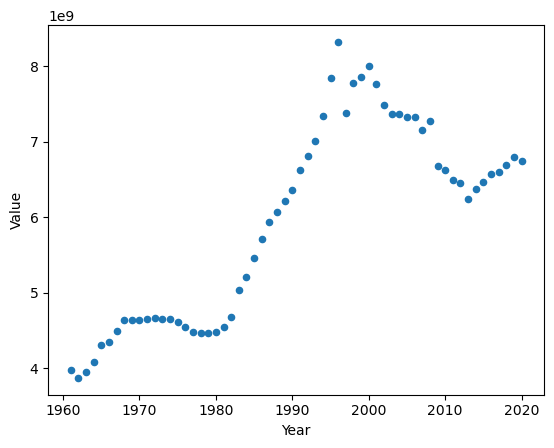

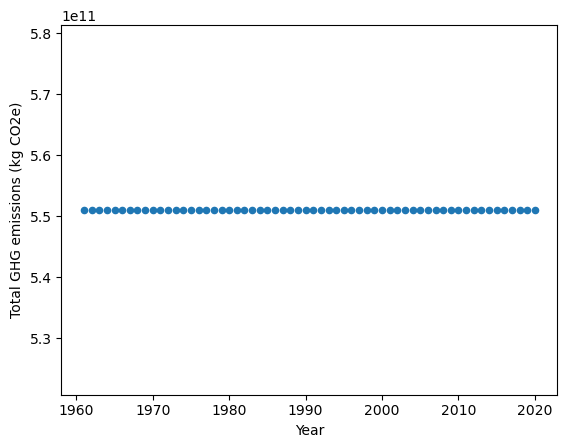

In [29]:
cattle_emissions = live_emissions.loc[live_emissions['Animal species'] == 'Cattle']
cattle_emissions.plot(x='Year', y='Value', kind='scatter')
cattle_emissions.plot(x='Year', y='Total GHG emissions (kg CO2e)', kind='scatter')

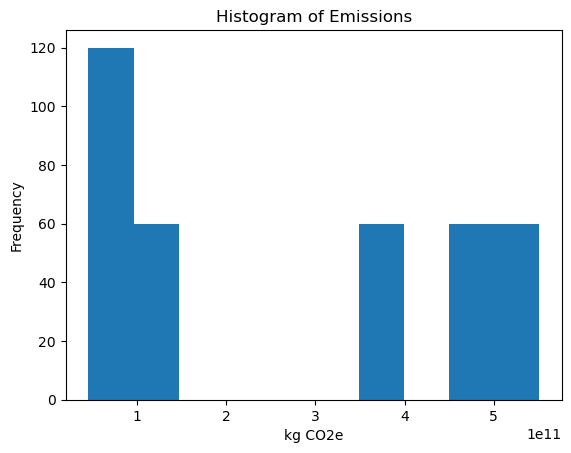

In [30]:
plt.hist(live_emissions['Total GHG emissions (kg CO2e)'], bins=10)
plt.title('Histogram of Emissions')
plt.xlabel('kg CO2e')
plt.ylabel('Frequency')
plt.show()


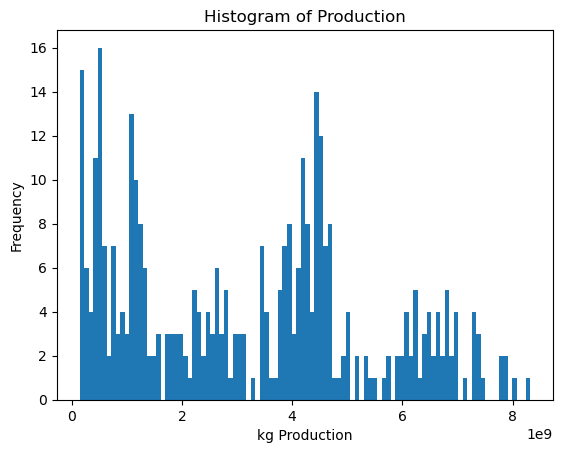

In [31]:
plt.hist(live_emissions['Value'], bins=100)
plt.title('Histogram of Production')
plt.xlabel('kg Production')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Year', ylabel='Total GHG emissions (kg CO2e)'>

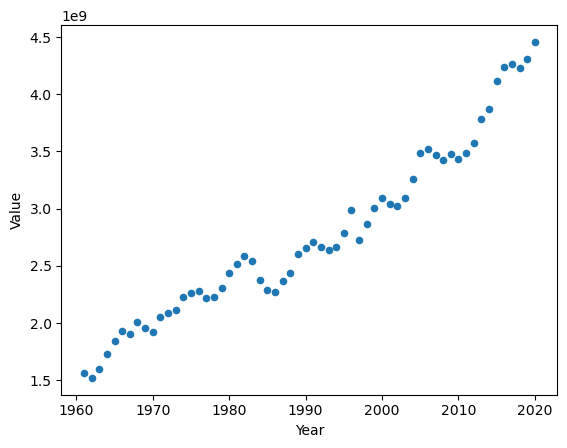

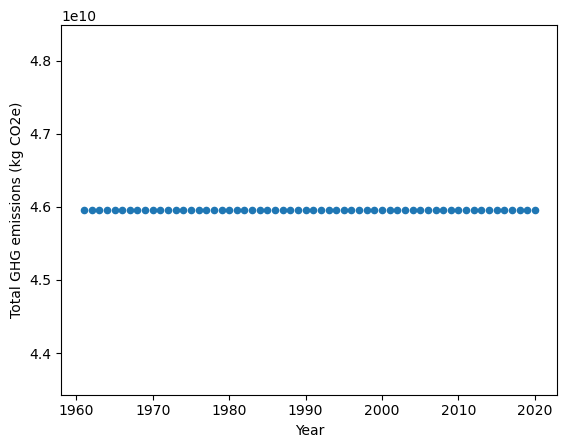

In [32]:
Sheep_emissions = live_emissions.loc[live_emissions['Animal species'] == 'Sheep']
Sheep_emissions.plot(x='Year', y='Value', kind='scatter')
Sheep_emissions.plot(x='Year', y='Total GHG emissions (kg CO2e)', kind='scatter')

<Axes: xlabel='Year', ylabel='Total GHG emissions (kg CO2e)'>

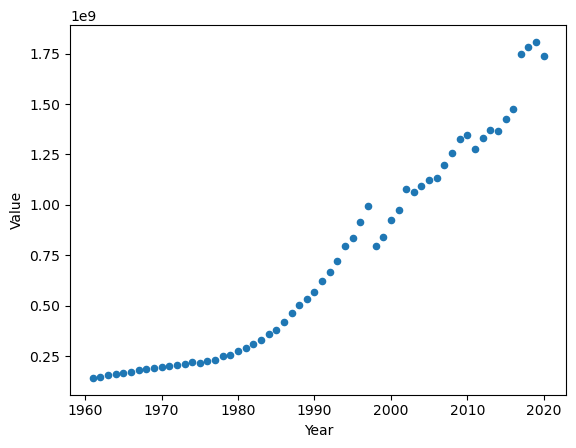

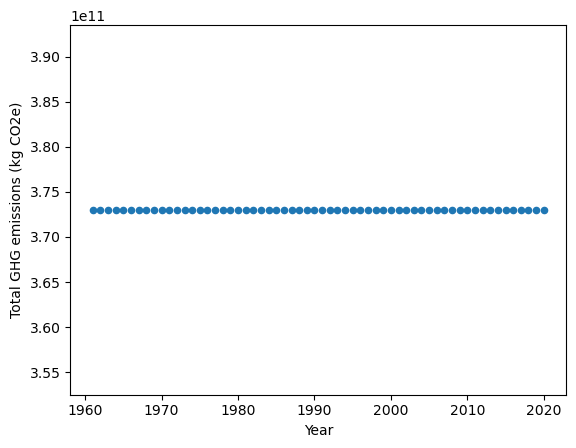

In [33]:
Chicken_emissions = live_emissions.loc[live_emissions['Animal species'] == 'Chicken']
Chicken_emissions.plot(x='Year', y='Value', kind='scatter')
Chicken_emissions.plot(x='Year', y='Total GHG emissions (kg CO2e)', kind='scatter')

In [34]:
live_emissions['Animal species'].unique()

array(['Buffaloes', 'Cattle', 'Chicken', 'Goats', 'Pigs', 'Sheep'],
      dtype=object)

In [35]:
# forecasting production value from livestock file
# what would emissions be if trends continue?

In [36]:
#prophet DF clean
live_prophet = live_emissions[['Animal species', 'Year', 'Final_GHG']]
live_prophet = live_prophet.rename(columns ={'Animal species':'group', 'Year':'ds', 'Final_GHG':'y'})
live_prophet['ds'] = pd.to_datetime(live_prophet['ds'], format='%Y')

display(live_prophet)

,group,ds,y
0,Buffaloes,1961-01-01,1.064558e+12
1,Buffaloes,1962-01-01,1.077973e+12
2,Buffaloes,1963-01-01,1.088534e+12
3,Buffaloes,1964-01-01,1.189815e+12
4,Buffaloes,1965-01-01,1.205287e+12
...,...,...,...
355,Sheep,2016-01-01,7.039819e+11
356,Sheep,2017-01-01,7.069478e+11
357,Sheep,2018-01-01,7.011059e+11
358,Sheep,2019-01-01,7.146234e+11


16:45:07 - cmdstanpy - INFO - Chain [1] start processing
16:45:07 - cmdstanpy - INFO - Chain [1] done processing
16:45:07 - cmdstanpy - INFO - Chain [1] start processing
16:45:08 - cmdstanpy - INFO - Chain [1] done processing
16:45:08 - cmdstanpy - INFO - Chain [1] start processing
16:45:08 - cmdstanpy - INFO - Chain [1] done processing
16:45:09 - cmdstanpy - INFO - Chain [1] start processing
16:45:09 - cmdstanpy - INFO - Chain [1] done processing
16:45:09 - cmdstanpy - INFO - Chain [1] start processing
16:45:09 - cmdstanpy - INFO - Chain [1] done processing
16:45:09 - cmdstanpy - INFO - Chain [1] start processing
16:45:10 - cmdstanpy - INFO - Chain [1] done processing


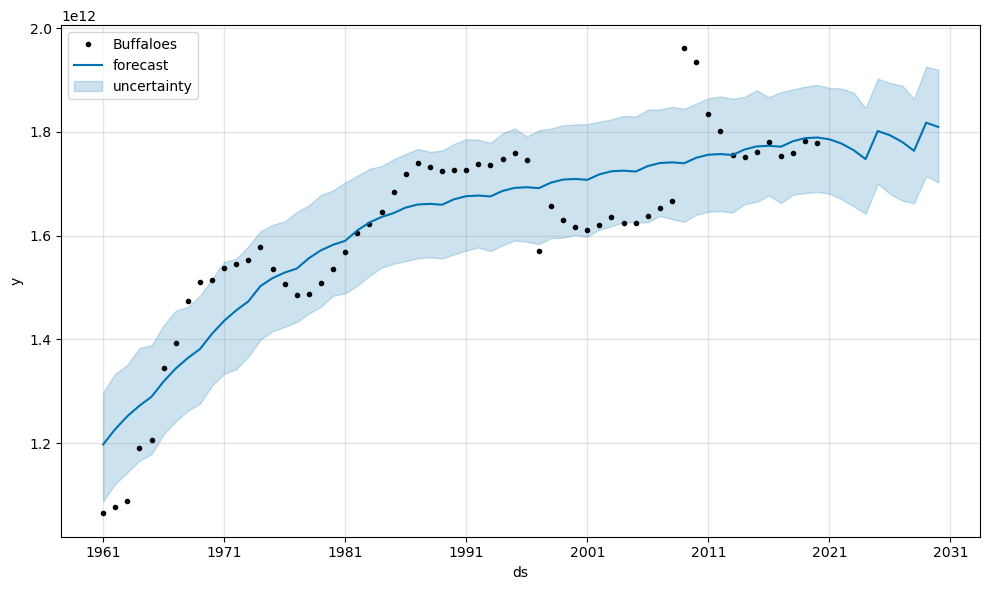

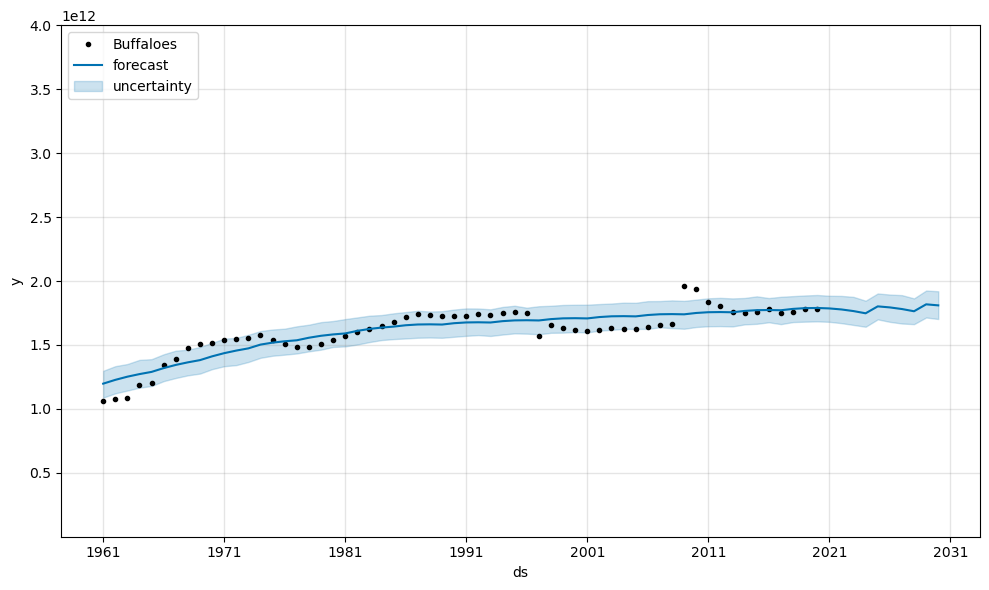

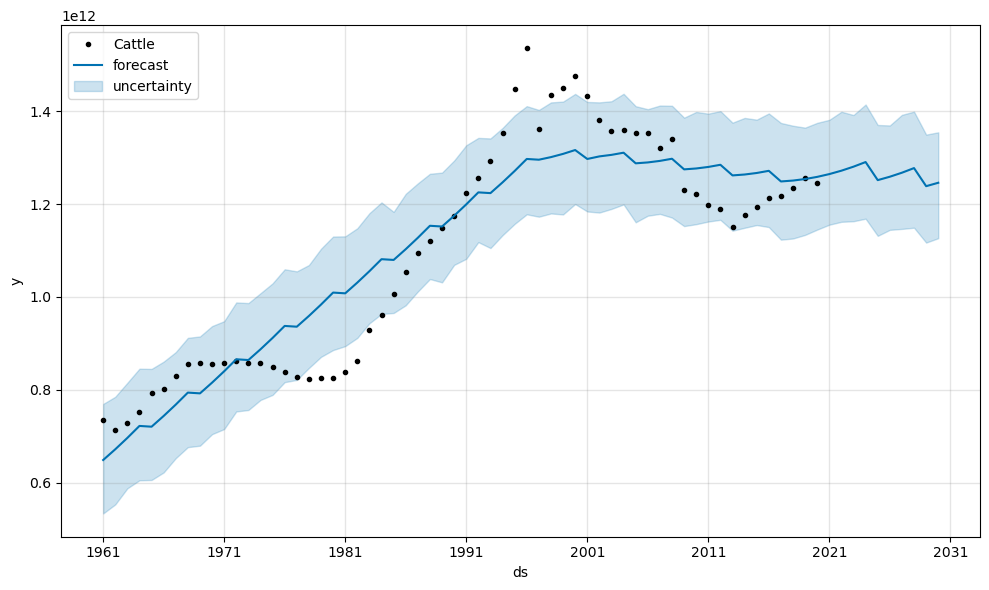

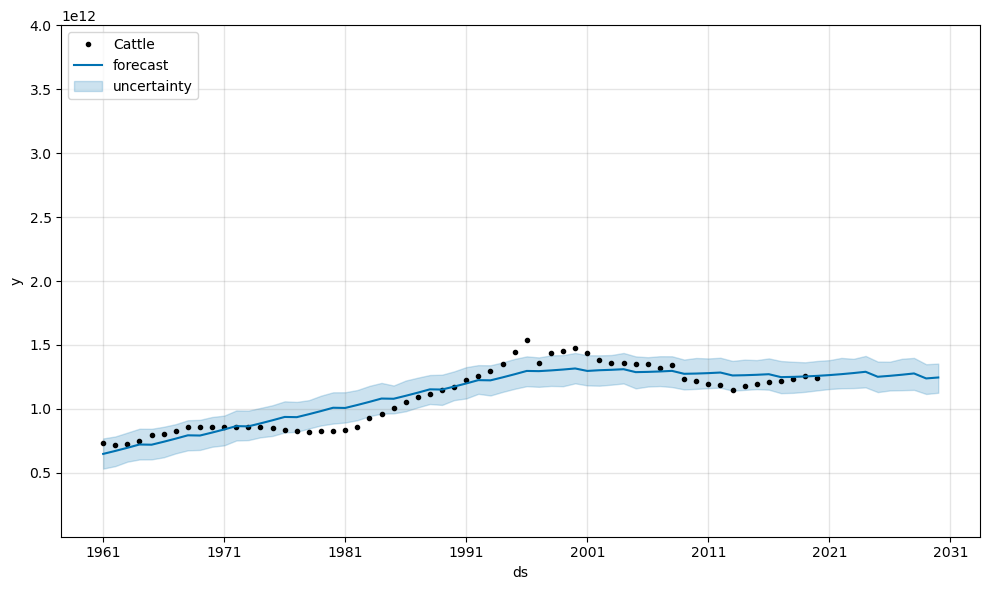

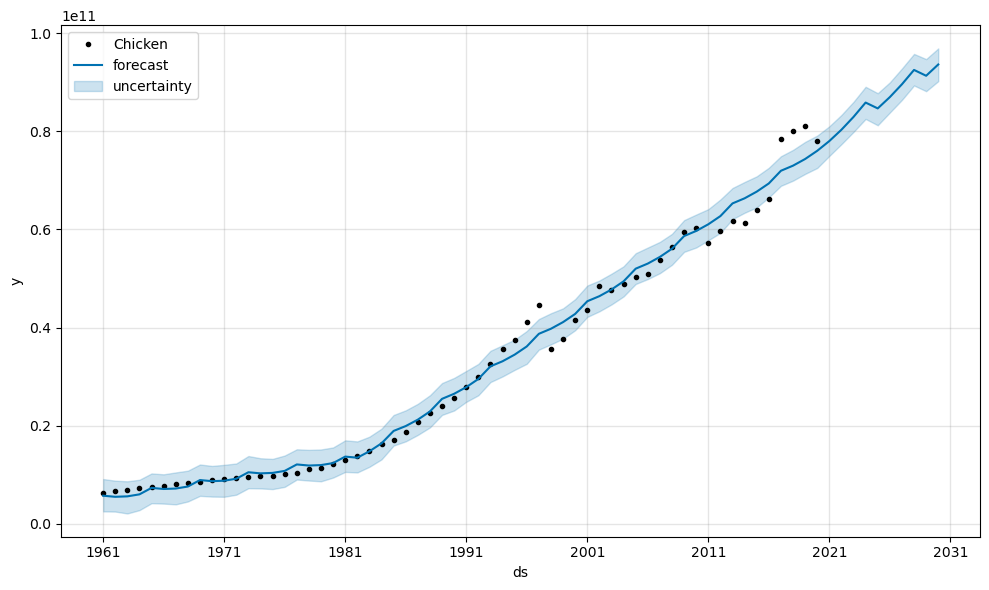

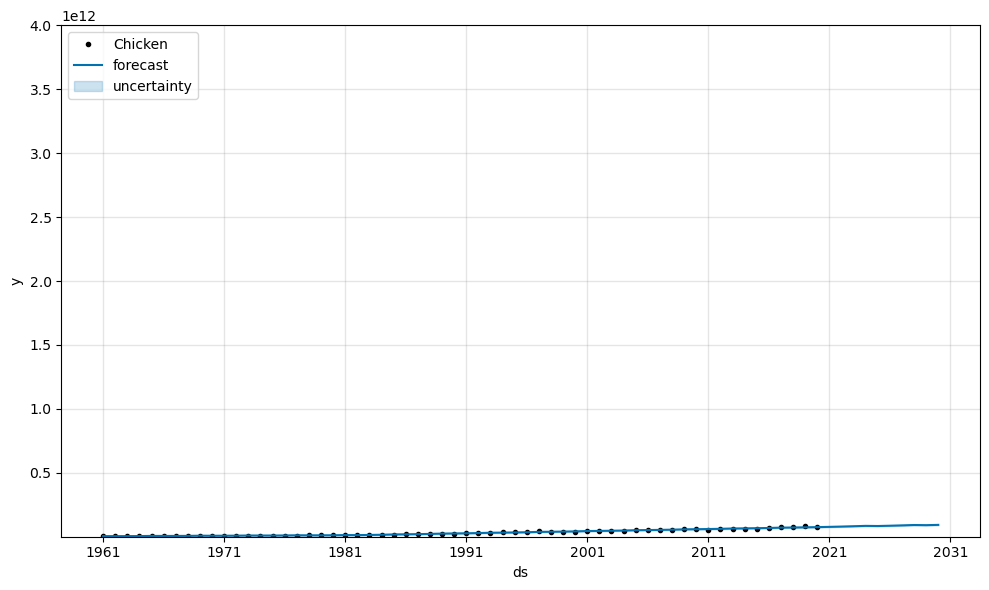

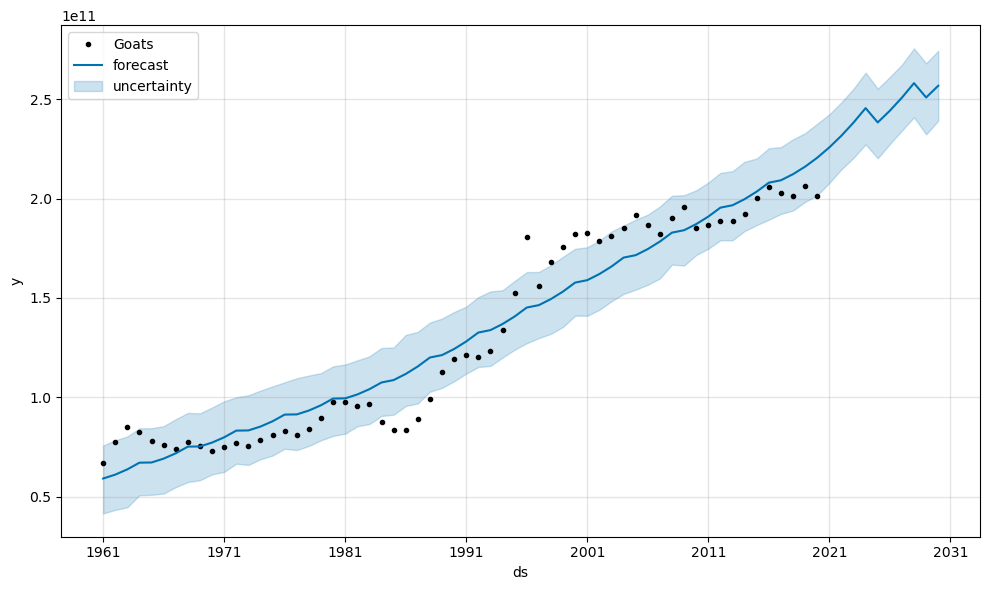

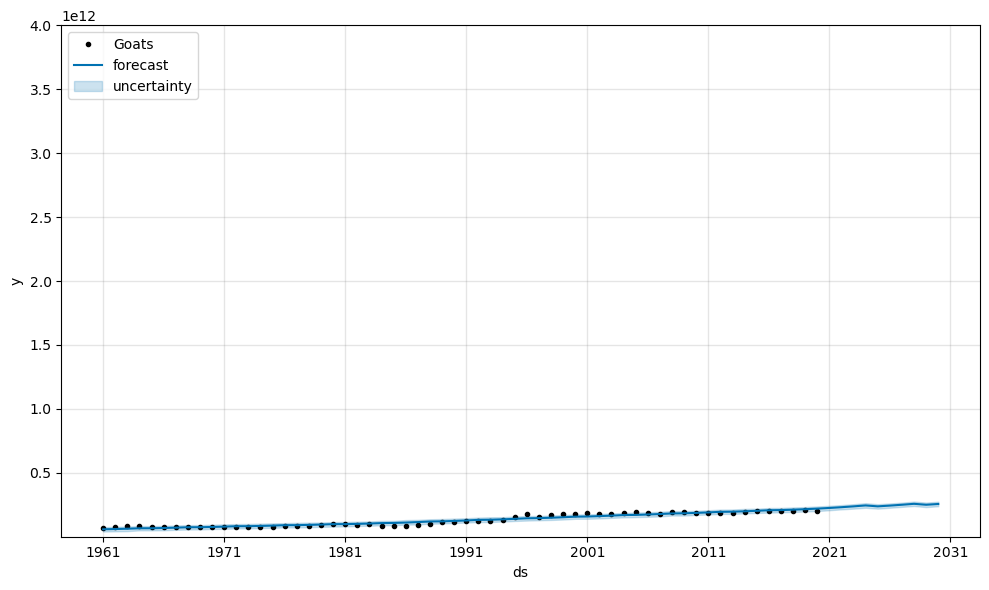

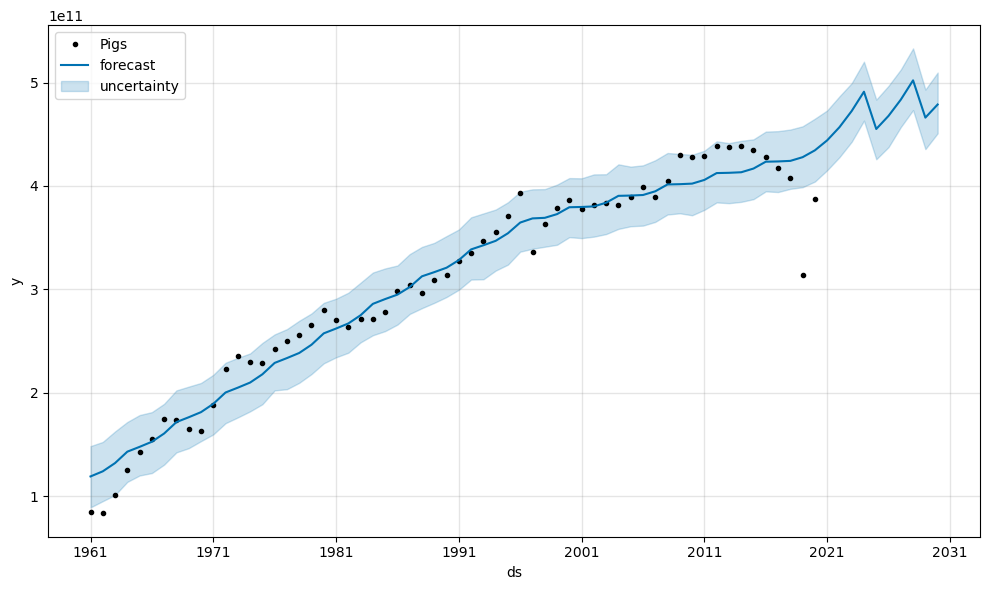

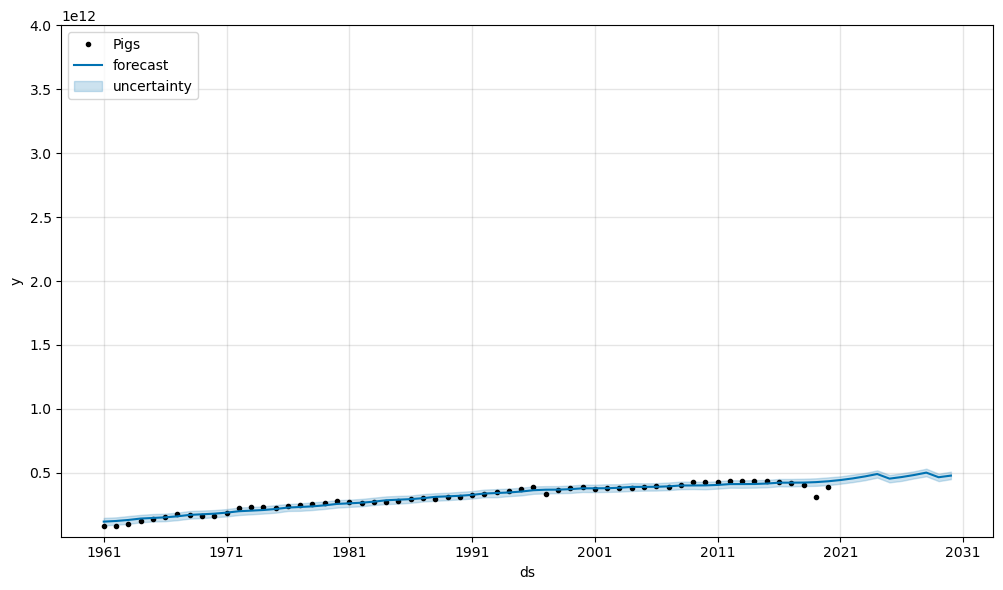

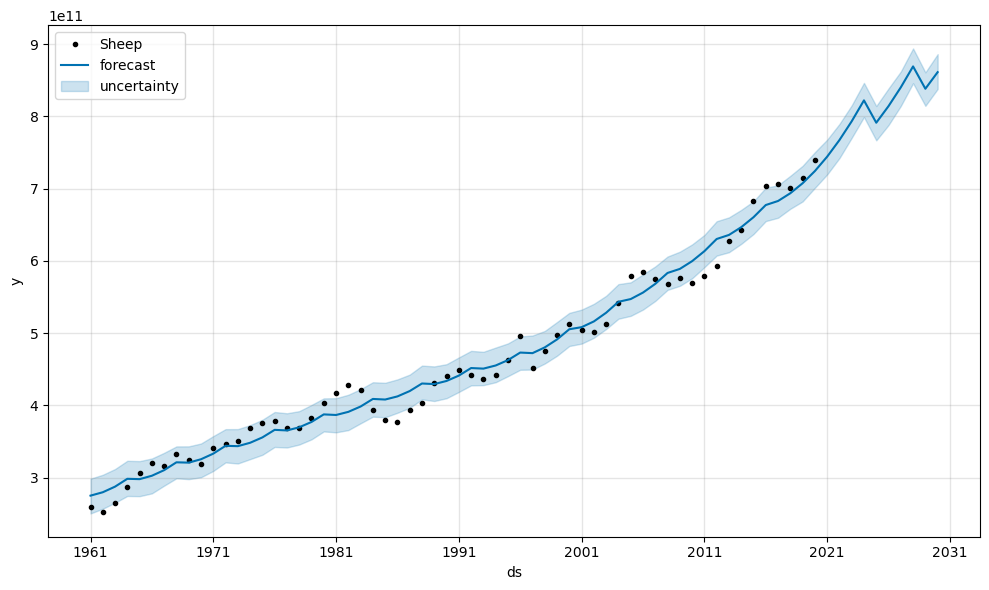

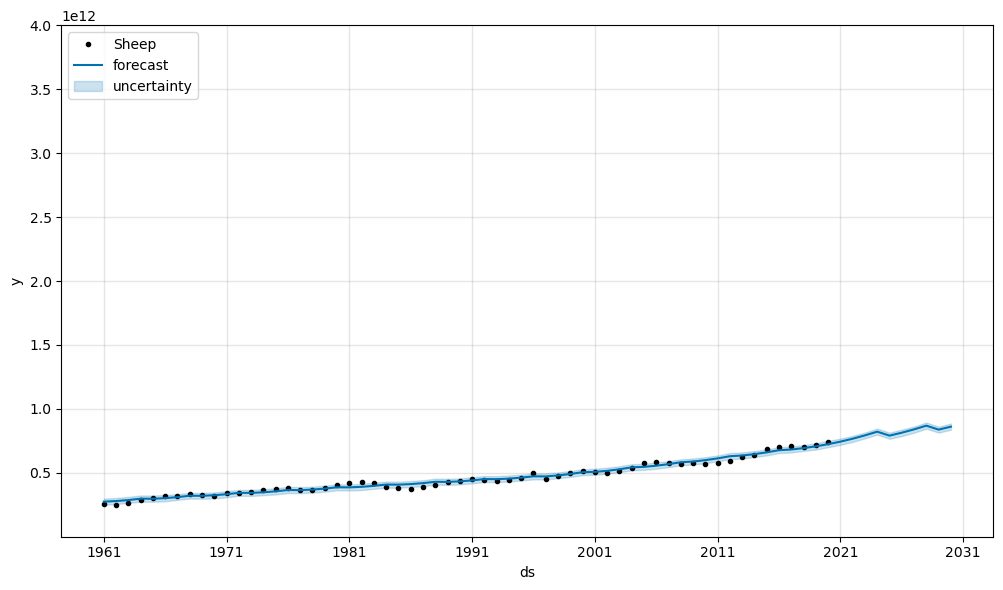

In [37]:
from prophet import Prophet
# Create a list of unique/distinct livestock
groups = live_emissions['Animal species'].unique()

# Create a separate forecast for each group with iterating over unique zipcode groups
forecasts = []

for group in groups:
    
    # Subset the data for each group
    group_data = live_prophet[live_prophet['group'] == group]

    # Create Prophet model
    model = Prophet()
    model.fit(group_data)

    # Precdict forecast for the next 10 Years
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)

    # Add the group value column to the forecast DataFrame
    forecast['group'] = group

    # Append the forecast to the list of forecasts
    forecasts.append(forecast)
    
    #print unaltered axis of each forecast as part of the for-loop
    model.plot(forecast)
    plt.legend([group,'forecast', 'uncertainty'],loc='upper left')
    
    #print second copy of each forecast with normalized axis
    model.plot(forecast)
    plt.ylim([1e9, 4e12])
    plt.legend([group,'forecast', 'uncertainty'],loc='upper left')

# Combine the forecasts for all groups into a single DataFrame
combined_forecast = pd.concat(forecasts)

# display(combined_forecast)

In [ ]:
# combined_forecast

In [ ]:
# model.plot(combined_forecast)
# plt.legend()